In [19]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [20]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/NKG-Historical-Data.csv', sep=",")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df = df.str.replace(',', '').astype(float)

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [21]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [22]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [23]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[18042.29977248 18038.93559621 18035.57141993 18032.20724366
 18028.84306738 18025.47889111 18022.11471483 18018.75053856
 18015.38636228 18012.02218601 18008.65800973 18005.29383346
 18001.92965719 17998.56548091 17995.20130464 17991.83712836
 17988.47295209 17985.10877581 17981.74459954 17978.38042326
 17975.01624699 17971.65207071 17968.28789444 17964.92371816
 17961.55954189 17958.19536561 17954.83118934 17951.46701306
 17948.10283679 17944.73866051]


In [24]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 14261.506781801363
Testing MAPE: 327.08617451302956
Testing MAE: 14247.649967477475


In [25]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[18042.29977248 18038.93559621 18035.57141993 18032.20724366
 18028.84306738 18025.47889111 18022.11471483 18018.75053856
 18015.38636228 18012.02218601 18008.65800973 18005.29383346
 18001.92965719 17998.56548091 17995.20130464 17991.83712836
 17988.47295209 17985.10877581 17981.74459954 17978.38042326
 17975.01624699 17971.65207071 17968.28789444 17964.92371816
 17961.55954189 17958.19536561 17954.83118934 17951.46701306
 17948.10283679 17944.73866051 17941.37448424 17938.01030796
 17934.64613169 17931.28195541 17927.91777914 17924.55360286
 17921.18942659 17917.82525031 17914.46107404 17911.09689776
 17907.73272149 17904.36854521 17901.00436894 17897.64019266
 17894.27601639 17890.91184011 17887.54766384 17884.18348757
 17880.81931129 17877.45513502 17874.09095874 17870.72678247
 17867.36260619 17863.99842992 17860.63425364 17857.27007737
 17853.90590109 17850.54172482 17847.17754854 17843.81337227
 17840.44919599 17837.08501972 17833.7

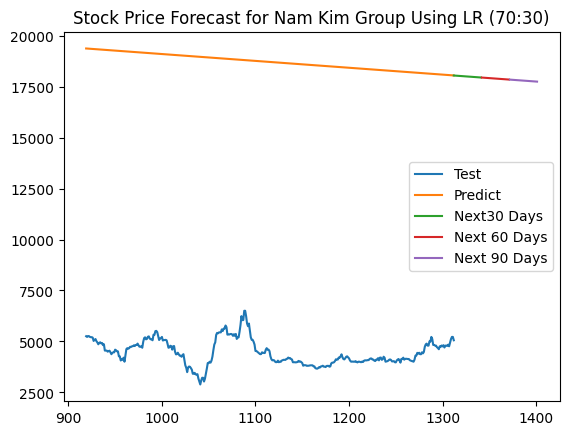

In [26]:
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60])
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(['Test', 'Predict','Next30 Days', "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Nam Kim Group Using LR (70:30)")
plt.show()

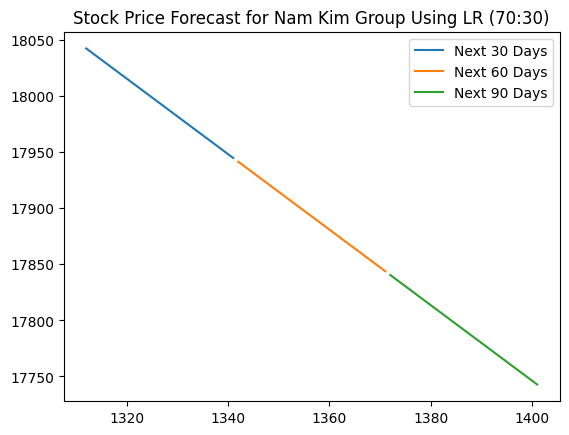

In [27]:
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60]) # Slice y_next_90_days to match x-axis dimensions
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(["Next 30 Days", "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Nam Kim Group Using LR (70:30)")
plt.show()